#Marketing predictions and segmentation 

Autor:
* David Dizes

In [ ]:
# Agruegue aquí las librerías que necesite
import tensorflow as tf
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix



!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1. Entendimiento del problema
---
Agruegue una explicación de el problema que trata a solucionar. Intente dar respuesta a las siguientes preguntas:

* De dónde vienen los datos?
  De una pagina con dataset para machine learning 
  https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
* Qué tipo de datos tenemos?
  Multivariable
* En qué formato están los datos?
  Base de Datos
* Cuál es el objetivo de este proyecto?
  Predecir si un cliente se va a suscribir 
* Quienes se beneficiarían del producto?
  Teoricamente a la empresa de donde provienen los datos/clientes, realmente a las empresas que quieran hacer analisis de datos para el marketing con bases de datos mas pequeñas

## 2. Carga de datos
---

Implemente las funciones necesarias para cargar la información en dependencia de su procedencia (web, archivos planos, csv, bases de datos, entre otros).

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip bank-additional.zip

--2022-11-21 13:07:58--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/x-httpd-php]
Saving to: ‘bank-additional.zip.1’

bank-additional.zip 100%[===================>] 434.15K  --.-KB/s    in 0.05s   

2022-11-21 13:07:59 (8.40 MB/s) - ‘bank-additional.zip.1’ saved [444572/444572]

Archive:  bank-additional.zip
   creating: bank-additional/
  inflating: bank-additional/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/bank-additional/
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional.csv  
  inflating: __MAC

In [ ]:
# Ingrese su código aquí

corpus = pd.read_csv('/content/bank-additional/bank-additional-full.csv',sep=';')


In [ ]:
corpus.head(7)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0db2770710>,
      dtype=object)

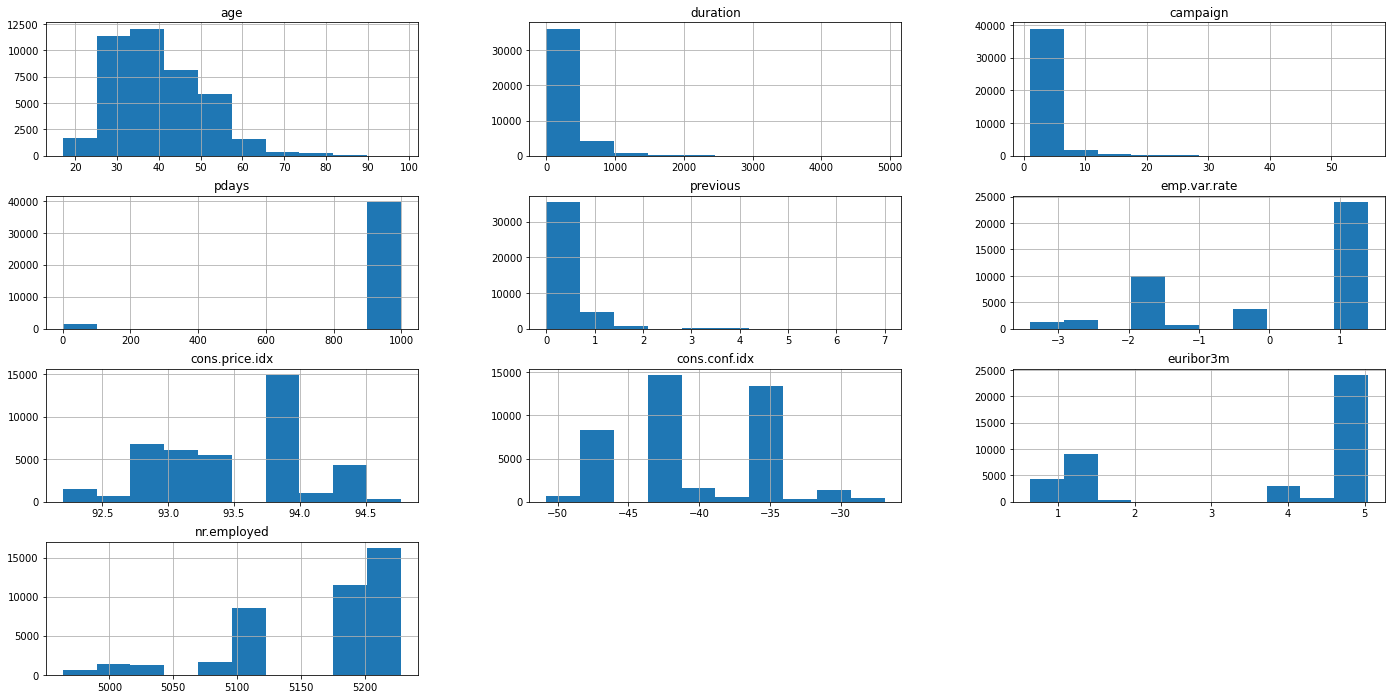

In [ ]:
plt.rcParams["figure.figsize"] = (24, 12)
corpus.hist()

In [ ]:
plt.rcParams["figure.figsize"] = (22, 3)
corpus._get_numeric_data().columns.tolist()

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

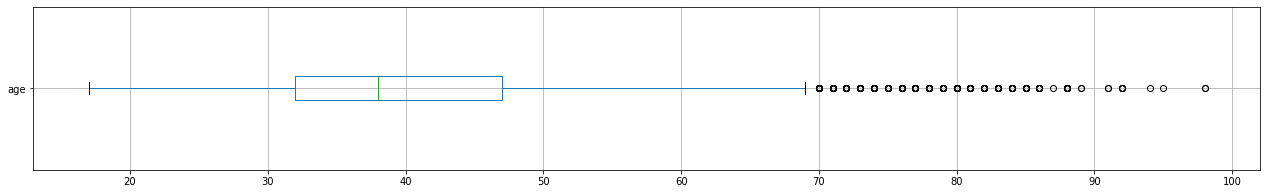

In [ ]:
temp_df = pd.DataFrame(corpus, columns=['age'])
temp_df.boxplot(vert=False)

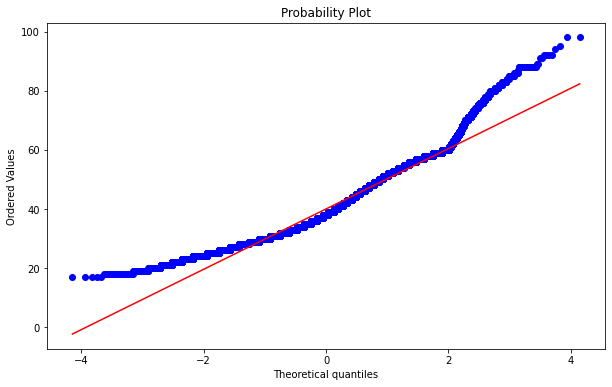

In [ ]:
plt.rcParams["figure.figsize"] = (10, 6)
stats.probplot(corpus['age'], dist="norm", plot=plt)
plt.show()

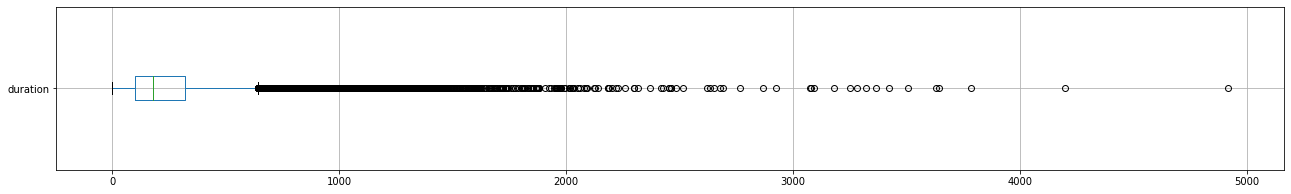

In [ ]:
temp_df = pd.DataFrame(corpus, columns=['duration'])
temp_df.boxplot(vert=False)

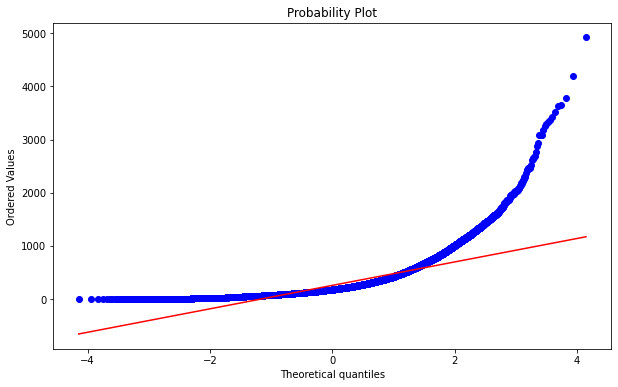

In [ ]:
plt.rcParams["figure.figsize"] = (10, 6)
stats.probplot(corpus['duration'], dist="norm", plot=plt)
plt.show()

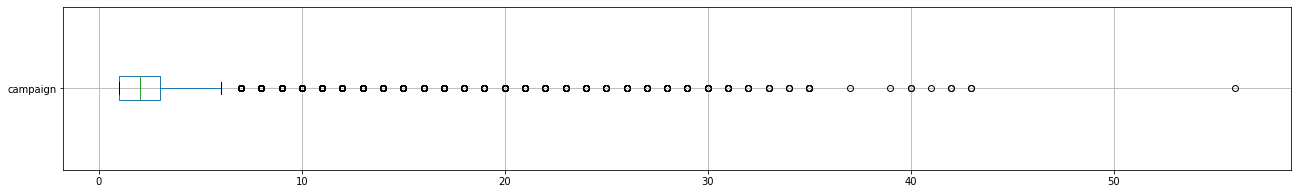

In [ ]:
temp_df = pd.DataFrame(corpus, columns=['campaign'])
temp_df.boxplot(vert=False)

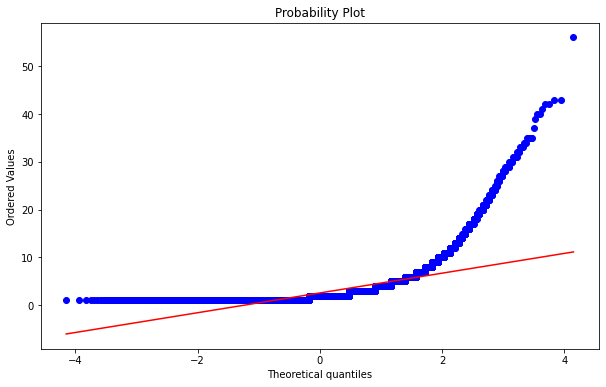

In [ ]:
plt.rcParams["figure.figsize"] = (10, 6)
stats.probplot(corpus['campaign'], dist="norm", plot=plt)
plt.show()

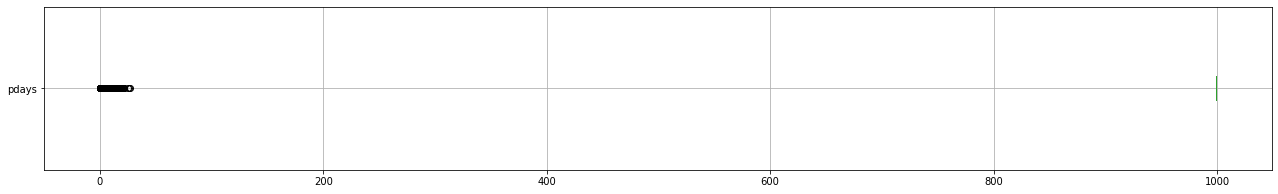

In [ ]:
temp_df = pd.DataFrame(corpus, columns=['pdays'])
temp_df.boxplot(vert=False)

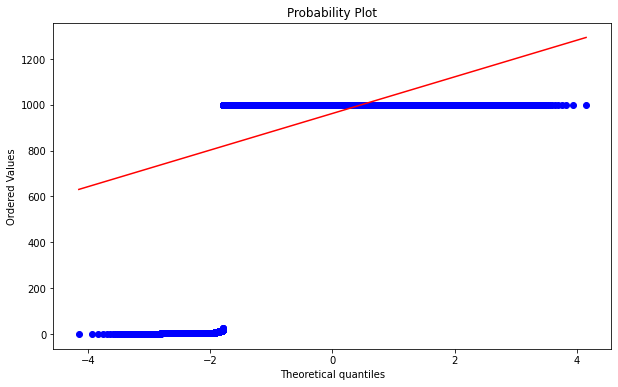

In [ ]:
plt.rcParams["figure.figsize"] = (10, 6)
stats.probplot(corpus['pdays'], dist="norm", plot=plt)
plt.show()

In [ ]:
corpus['pdays'].describe()

count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

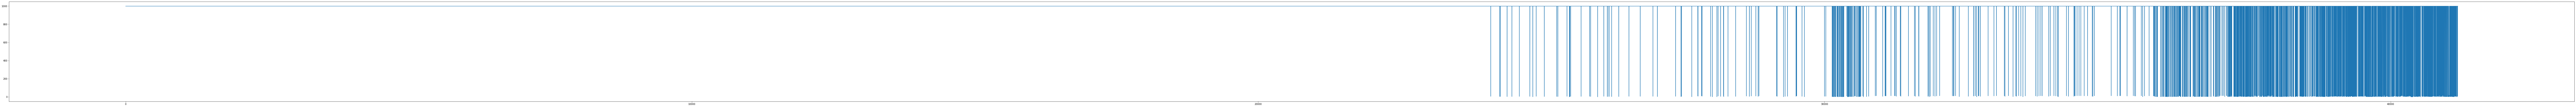

In [ ]:
plt.rcParams["figure.figsize"] = (200, 8)
plt.plot(corpus['pdays'].tolist(), label="pdays")
plt.show()

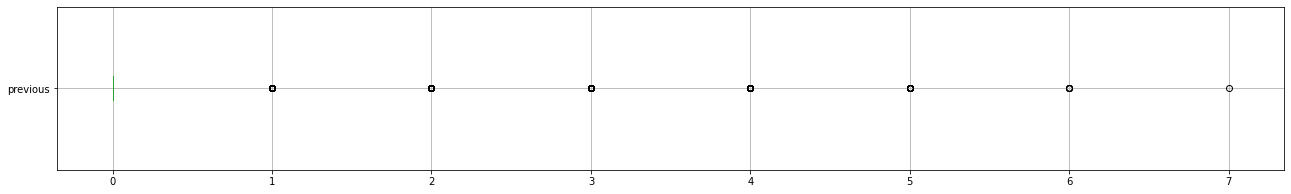

In [ ]:
temp_df = pd.DataFrame(corpus, columns=['previous'])
temp_df.boxplot(vert=False)

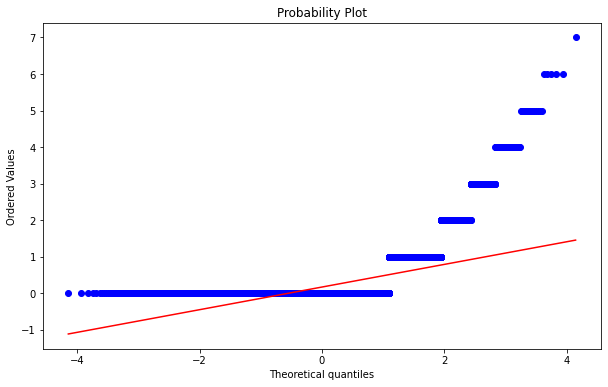

In [ ]:
plt.rcParams["figure.figsize"] = (10, 6)
stats.probplot(corpus['previous'], dist="norm", plot=plt)
plt.show()

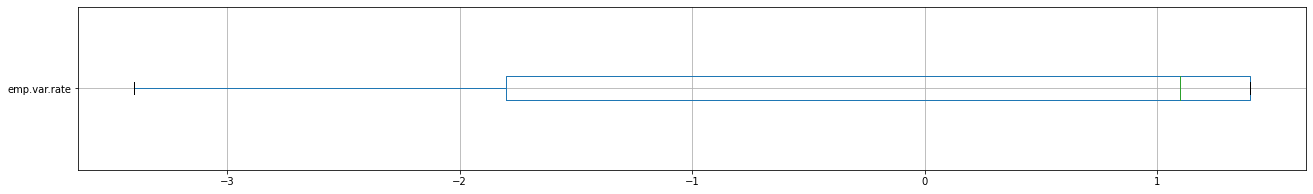

In [ ]:
temp_df = pd.DataFrame(corpus, columns=['emp.var.rate'])
temp_df.boxplot(vert=False)

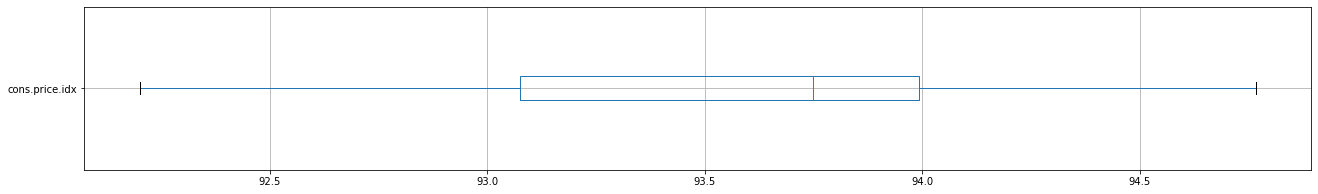

In [ ]:
temp_df = pd.DataFrame(corpus, columns=['cons.price.idx'])
temp_df.boxplot(vert=False)

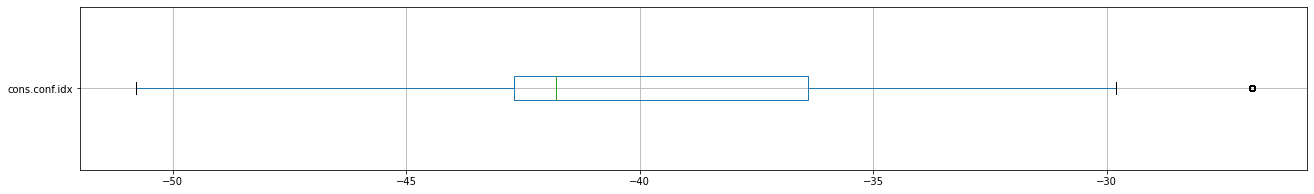

In [ ]:
temp_df = pd.DataFrame(corpus, columns=['cons.conf.idx'])
temp_df.boxplot(vert=False)

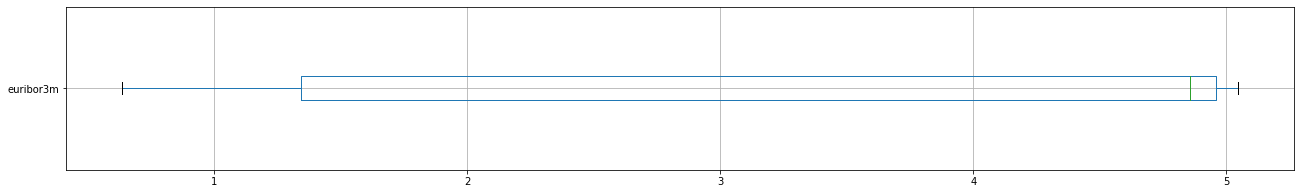

In [ ]:
temp_df = pd.DataFrame(corpus, columns=['euribor3m'])
temp_df.boxplot(vert=False)

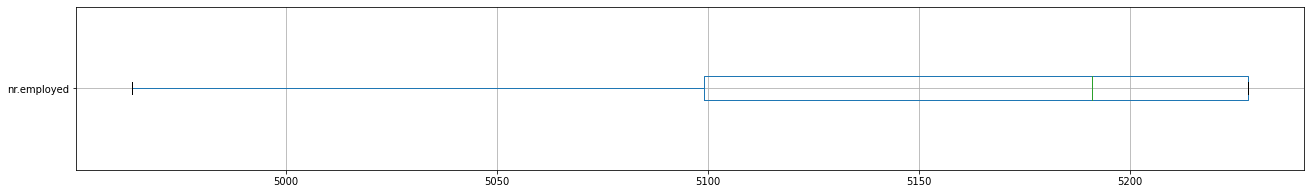

In [ ]:
temp_df = pd.DataFrame(corpus, columns=['nr.employed'])
temp_df.boxplot(vert=False)

## 3. Preprocesamiento
---

Escriba una función que permita preprocesar los datos en dependencia del dominio de la aplicación:

* Información estructurada: outliers, z-scaling, min-max normalization, entre otros.
* Texto: tokenization, stopwords, expresiones regulares, stemming, unidecode, entre otros.
* Imágenes: data augmentation, resizing, ajuste de color, entre otros.
* Series de tiempo: outliers, suavizado, interpolación, entre otros.

In [ ]:
corpus_Encode=corpus.copy()
#La Base de datos ya se encuentra prepocesada en cuestion de repetidos y valores nulos o vacios
#se trasnforman los valores de texto en valores numericos mas estandar y personalizados teniendo en cuenta por ejemplo los meses que no aparecen
features = ['default' ,'housing', 'loan','month','day_of_week', 'y','contact','education','poutcome','marital','job']
feature_label_dict = {
                'default':{'unknown':0,'no':1,'yes':2},
                'housing':{'unknown':0,'no':1,'yes':2},
                'loan':{'unknown':0,'no':1,'yes':2},
                'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12},
                'day_of_week':{'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':7},
                'y':{'no':0,'yes':1},
                'contact':{'unknown':0, 'cellular':1, 'telephone':2},
                'education':{'unknown':0,  'basic.4y':1,'basic.6y':2,'basic.9y':3,'high.school':4,'illiterate':5,'professional.course':6,'university.degree':7,},
                'poutcome':{'failure':1,'nonexistent':0,'success':2},
                'marital':{'unknown':0,'divorced':1,'single':2,'married':3},
                'job':{'unknown':0,'unemployed':1, 'student':2,'management':3, 'technician':4, 'entrepreneur':5, 'blue-collar':6, 'retired':7, 'admin.':8, 'services':9, 'self-employed':10, 'housemaid':11}
                 }
for f in features:     
  corpus_Encode = corpus_Encode.replace({f:feature_label_dict[f]})

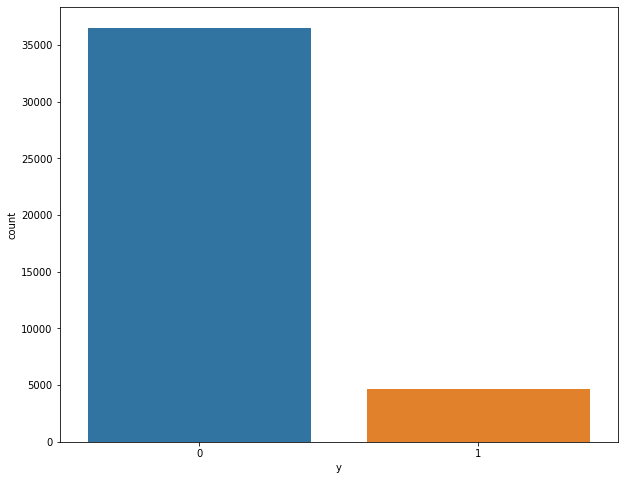

In [ ]:

plt.rcParams["figure.figsize"] = (10, 8)
corpus_Encode['y'].value_counts()
sns.countplot(x='y', data=corpus_Encode)
plt.show()
#Queria usar tecnicas de generado de datos sinteticos pero no me funcionarion las librerias

In [ ]:
X= corpus_Encode.drop(['y'],axis=1)
X.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,11,3,1,1,1,1,2,5,1,261,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
1,57,9,3,4,0,1,1,2,5,1,149,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
2,37,9,3,4,1,2,1,2,5,1,226,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
3,40,8,3,2,1,1,1,2,5,1,151,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
4,56,9,3,4,1,1,2,2,5,1,307,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
5,45,9,3,3,0,1,1,2,5,1,198,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
6,59,8,3,6,1,1,1,2,5,1,139,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
7,41,6,3,0,0,1,1,2,5,1,217,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
8,24,4,2,6,1,2,1,2,5,1,380,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
9,25,9,2,4,1,2,1,2,5,1,50,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
X.dtypes

age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X,corpus_Encode['y'], test_size=0.4, random_state=0)


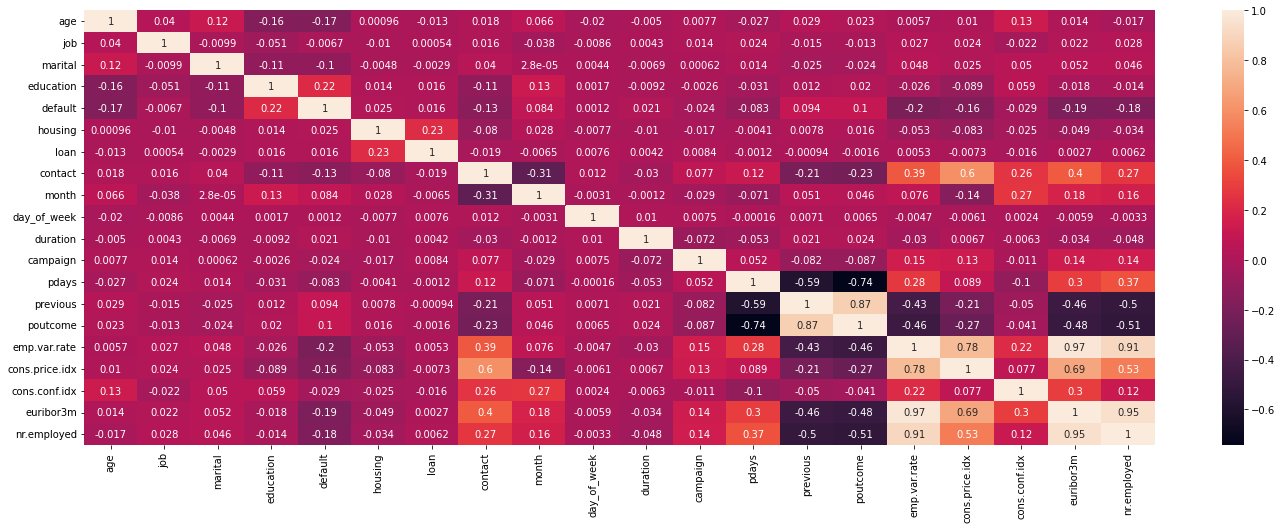

In [ ]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (24, 8)
sns.heatmap(X_test.corr(),annot=True);

## 4. Modelamiento
---

Seleccione un modelo apropiado para el problema que desea solucionar (clasificación, regresión, agrupamiento, tópicos, entre otros) y entrenelo con las representaciones obtenidas en el paso anterior.


In [ ]:
from sklearn.neural_network import MLPClassifier


In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1).fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(clf.score(X_test, y_test))



0.9085336246661811


## 6. Evaluacion
---

Evalúe el desempeño de su modelo con una métrica de desempeño apropiada al problema.


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     14655
           1       0.69      0.32      0.43      1821

    accuracy                           0.91     16476
   macro avg       0.80      0.65      0.69     16476
weighted avg       0.89      0.91      0.89     16476



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


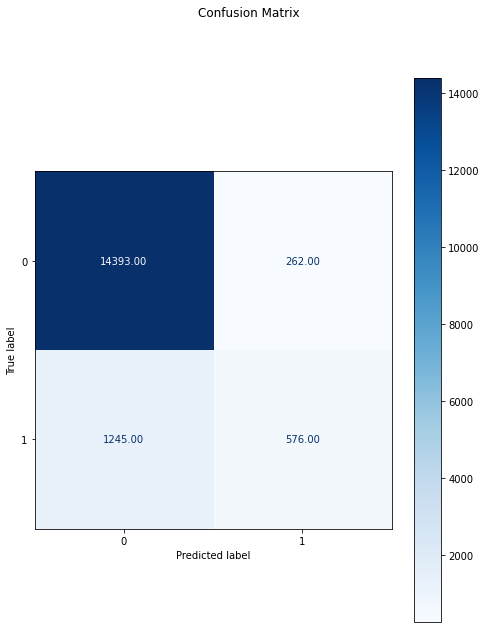

In [ ]:
plt.rcParams["figure.figsize"] = (8, 10)
fig=plot_confusion_matrix(clf, X_test, y_test,display_labels=["0",'1'],cmap=plt.cm.Blues,values_format = '.2f')
fig.figure_.suptitle("Confusion Matrix ")
plt.show()

## 7. Discusión y Conclusiones
---

EL modelo dio un accuracy de .90 que me parece muy bueno y dado a que la base de datos esta limpia y cuenta con varias caracteristicas utiles para el modelo.
Estoy seguro que se puede mejorar el acuracy ya que en columnas previus y pdays podrian normalizarse mucho mejor y ademas si se generan mas datos sinteticos para tener un mejor equilibrio de clases

nota: Me disculpo por entregarlo fuera del horario establecido, se me olvido por completo la fecha de entrega y me hago responsable de las consecuencias que pueda tener sobre la nota 


